In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Inverse Transform sampling


## Rationale


**Inverse transform sampling** allows to transform samples from uniform distribution $U$ to any other distribution $D$, given the $CDF$ of $D$.

How can we do it?

Let's take

$$\large T(U) = X$$

where:

* $U$ is a uniform random variable
* $T$ is some kind of a transformation
* $X$ is the target random variable (let's use **exponential** distribution as an example)


Now, we said that to perform **inverse transformation sampling**, we need a $CDF$.

By definition $CDF$ (we'll call it $F_X(x)$ here) is given by: 

$$\large F_X(x) \triangleq P(X \leq x)$$

We said before that to get $X$, we'll apply certain transformation $T$ to a uniform random variable.

We can then say, that:

$$\large P(X \leq x) = P(T(U) \leq x)$$

Now, let's apply an ibnverse of $T$ to the both sides of the inequality:

$$\large = P(U \leq T^{-1}(x))$$

Uniform distribution has a nice property that it's $CDF$ at any given point $x$ is equal to the value of $x$.

Therefore, we can say that:

$$\large = T^{-1}(x)$$

and conclude that:

$$\large F_X(x) = T^{-1}(x)$$


## Conclusion

We demonstrated how to sample from any density $D$ using a sample from a uniform distribution and an inverse of $CDF$ od $D$. 

Now, let's apply it in practice!

## Code

Let's see how to apply this in Python. 

We'll use **exponential distribution** as an example.

In [3]:
# Define params
SAMPLE_SIZE = 100000
N_BINS = np.sqrt(SAMPLE_SIZE).astype('int') // 2
LAMBDA = 8 

Let's instantiate distributions.

We will instantiate an exponential distribution expicitly for comparison purposes.

___________

Note that **`scipy.stats`** has a slightly **different parametrization** of exponential than the populuar $\lambda$ parametrization. 

In the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), we read:

*A common parameterization for expon is in terms of the rate parameter lambda, such that pdf = lambda * exp(-lambda * x). This parameterization corresponds to using scale = 1 / lambda.*

____________

Therefore, we're going to use **`scale=1/LAMBDA`** to parametrize our test **exponential distribution**. 

In [9]:
# Instantiate U(0, 1)
unif = stats.uniform(0, 1)

# Instantiate Exp(8) for comparison purposes
exp = stats.expon(loc=0, scale=1/LAMBDA)

Now, we need to define the inverse transformation $T^{-1}(x)$ that will allow us to translate between uniform and exponential samples.

The $CDF$ of exponential distribution is defined as:

$$\large
\begin{equation}
  F_X(x) \triangleq
    \begin{cases}
      1 - e^{-\lambda x} \ \text{  for  }\ x \geq 0\\
      0 \ \ \ \ \ \ \ \ \ \ \ \ \ \  \text{for }\ x<0 \\
    \end{cases}       
\end{equation}
$$

Let's take the inverse of this function (solve for $x$):

$$\large y = 1 - e^{-\lambda x}$$

* subtract $1$ from both sides:

$$\large 1 - y = - e^{-\lambda x}$$

* take $ln$ of both sides:

$$\large ln(1 - y) = \lambda x$$

* divide both sides by $\lambda$:

$$\large x = \frac{ln(1 - y)}{\lambda}$$

<br>

**Et voilà!** 🎉🎉🎉 

We've got it! 💪🏼

<br>

Let's translate it to Python code:

In [10]:
# Define 
def transform_to_exp(x, lmbd):
    
    """Transoforms a uniform sample into an exponential sample"""
    
    return -np.log(1 - x) / lmbd

Take samples:

In [14]:
# Sample from uniform
sample_unif = unif.rvs(SAMPLE_SIZE)

# Sample from the true exponential
sample_exp = exp.rvs(SAMPLE_SIZE)

# Transform U -> Exp
sample_transform = transform_to_exp(sample_unif, LAMBDA)

A brief sanity check:

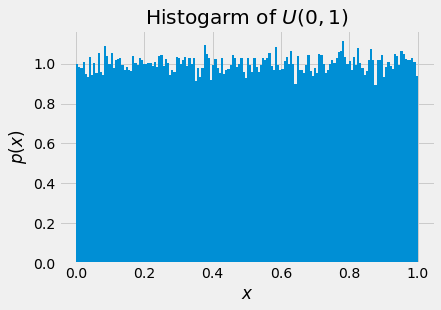

In [24]:
# Sanity check -> U(0, 1)
plt.hist(sample_unif, bins=N_BINS, density=True)
plt.title('Histogarm of $U(0, 1)$')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.show()

..and let's compare the resutls:

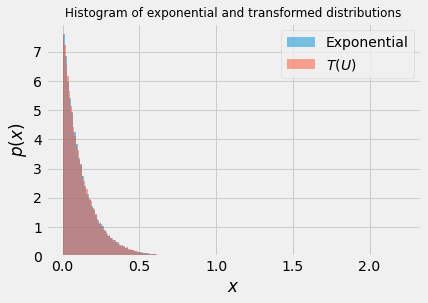

In [21]:
plt.hist(sample_exp, bins=N_BINS, density=True, alpha=.5, label='Exponential')
plt.hist(sample_transform, bins=N_BINS, density=True, alpha=.5, label='$T(U)$')
plt.legend()
plt.title('Histogram of exponential and transformed distributions', fontsize=12)
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.show()

Beautiful! It worked as expected 🎉🎉🎉